# Importing Libraries

In [1]:
# import system libs
import os
import itertools
from PIL import Image # pillow

# import data handling tools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import MaxPooling2D, Flatten, Dense,BatchNormalization,GlobalMaxPooling2D,Conv2D,Dropout,Flatten
from keras import regularizers
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
from imblearn.over_sampling import SMOTE

sns.set_style('darkgrid')

2024-08-04 16:23:49.127915: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-04 16:23:49.128065: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-04 16:23:49.261282: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_path = r"/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train"
test_path = r"/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test"
batch_s = 32
img_size= (224,224)
mode = "rgb"

# Reading data and graphing number of images in each class

In [3]:
def df_maker(path):
    file_paths = []
    labels = []

    folds = os.listdir(path)
    for fold in folds:
        fold_path = os.path.join(path,fold)
        file_list = os.listdir(fold_path)
        for file in file_list:
            file_path = os.path.join(fold_path,file)
            file_paths.append(file_path)
            labels.append(fold)


    file_series = pd.Series(file_paths,name="file_paths")
    label_series = pd.Series(labels,name="labels")

    df = pd.concat([file_series,label_series],axis=1)
    return df


In [4]:
train_df = df_maker(train_path)

In [5]:
test_df = df_maker(test_path)

In [6]:
all_data = pd.concat([train_df,test_df])

In [7]:
train_df

,file_paths,labels
0,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
1,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
2,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
3,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
4,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
...,...,...
5116,/kaggle/input/alzheimers-dataset-4-class-of-im...,MildDemented
5117,/kaggle/input/alzheimers-dataset-4-class-of-im...,MildDemented
5118,/kaggle/input/alzheimers-dataset-4-class-of-im...,MildDemented
5119,/kaggle/input/alzheimers-dataset-4-class-of-im...,MildDemented


In [8]:
test_df

,file_paths,labels
0,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
1,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
2,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
3,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
4,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
...,...,...
1274,/kaggle/input/alzheimers-dataset-4-class-of-im...,MildDemented
1275,/kaggle/input/alzheimers-dataset-4-class-of-im...,MildDemented
1276,/kaggle/input/alzheimers-dataset-4-class-of-im...,MildDemented
1277,/kaggle/input/alzheimers-dataset-4-class-of-im...,MildDemented


In [9]:
all_data

,file_paths,labels
0,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
1,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
2,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
3,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
4,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
...,...,...
1274,/kaggle/input/alzheimers-dataset-4-class-of-im...,MildDemented
1275,/kaggle/input/alzheimers-dataset-4-class-of-im...,MildDemented
1276,/kaggle/input/alzheimers-dataset-4-class-of-im...,MildDemented
1277,/kaggle/input/alzheimers-dataset-4-class-of-im...,MildDemented


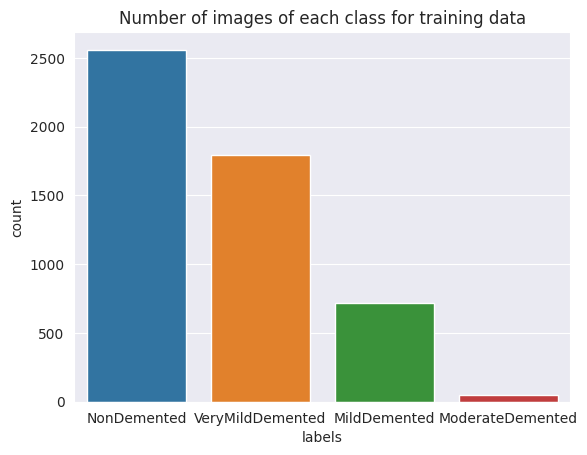

In [10]:
train_count_df = train_df.labels.value_counts().reset_index()
sns.barplot(data=train_count_df,x="labels",y="count")
plt.title("Number of images of each class for training data")
plt.show()

In [11]:
train_count_df

,labels,count
0,NonDemented,2560
1,VeryMildDemented,1792
2,MildDemented,717
3,ModerateDemented,52


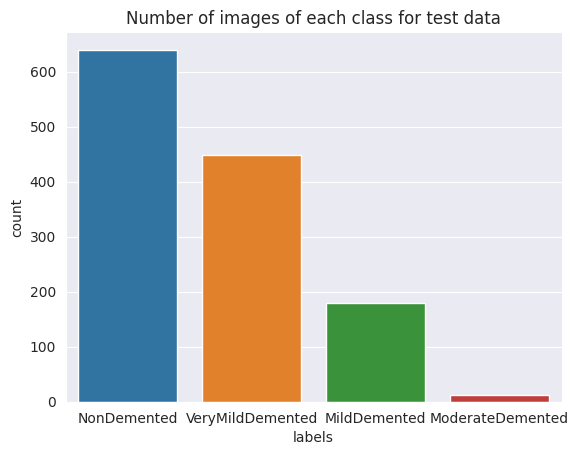

In [12]:
test_count_df = test_df.labels.value_counts().reset_index()
sns.barplot(data=test_count_df,x="labels",y="count")
plt.title("Number of images of each class for test data")
plt.show()

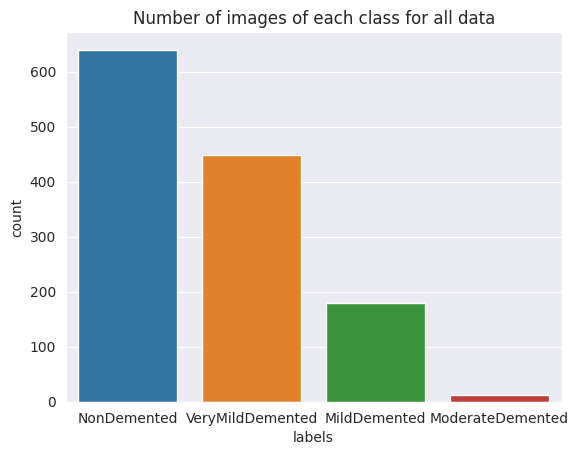

In [13]:
data_count_df = all_data.labels.value_counts().reset_index()
sns.barplot(data=test_count_df,x="labels",y="count")
plt.title("Number of images of each class for all data")
plt.show()

In [14]:
data_count_df

,labels,count
0,NonDemented,3200
1,VeryMildDemented,2240
2,MildDemented,896
3,ModerateDemented,64


#### * data is very imbalanced so we need to upsample

# Reading images and upsampling data using SMOTE

In [15]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator()

In [16]:
data_generator = datagen.flow_from_dataframe(
    all_data,
    x_col = "file_paths",
    y_col = "labels",
    target_size=img_size,
    batch_size=batch_s,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)


Found 6400 validated image filenames belonging to 4 classes.


In [17]:
data_generator.class_indices

{'MildDemented': 0,
 'ModerateDemented': 1,
 'NonDemented': 2,
 'VeryMildDemented': 3}

## Showing sample images from the data

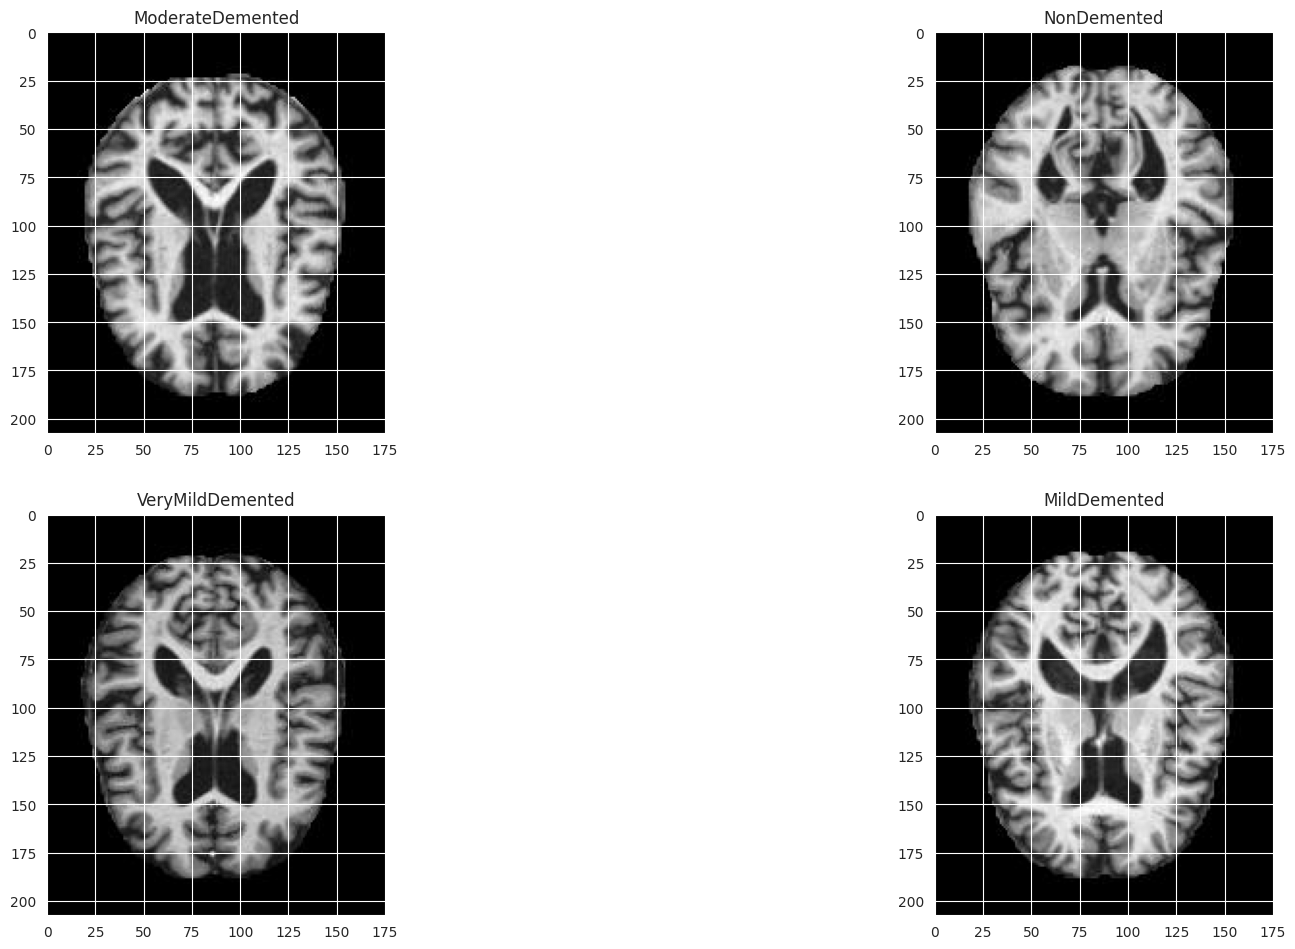

In [18]:
class_dirs = os.listdir(train_path)
plt.figure(figsize=(21, 24))
for i in range(len(class_dirs)):
    plt.subplot(4,2,i+1)
    img_path = f"{train_path}/{class_dirs[i]}/{os.listdir(f'{train_path}/{class_dirs[i]}')[0]}"
    img = plt.imread(img_path)/255
    plt.title(class_dirs[i])
    plt.imshow(img,cmap="gray")

### loading data from generator


In [19]:
data_imgs=np.concatenate([next(data_generator)[0] for i in range(data_generator.__len__())])
data_labels=np.concatenate([next(data_generator)[1] for i in range(data_generator.__len__())])

### Converting our color images to a vector and applying SMOTE method

In [20]:
data_imgs = data_imgs.reshape(-1, 224*224* 3)
data_imgs,data_labels = SMOTE(random_state=7).fit_resample(data_imgs,data_labels)
data_imgs = data_imgs.reshape(-1,224,224,3)

In [21]:
data_generator.class_indices

{'MildDemented': 0,
 'ModerateDemented': 1,
 'NonDemented': 2,
 'VeryMildDemented': 3}

In [22]:
map  ={0:'MildDemented',
 1:'ModerateDemented',
 2:'NonDemented',
 3:'VeryMildDemented'}

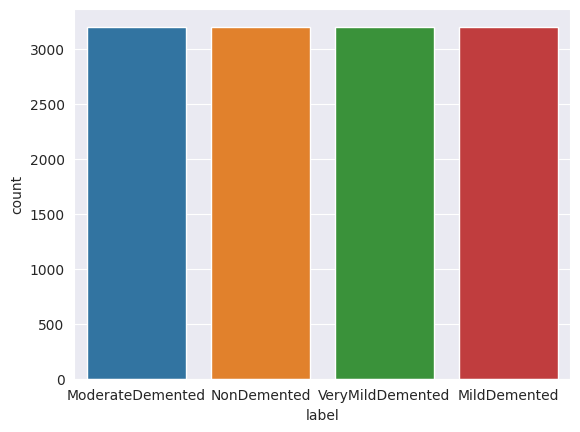

In [23]:
labels=pd.Series([map[i] for i in np.argmax(data_labels,axis=1)],name="label")
labels_count = labels.value_counts().reset_index()
sns.barplot(data=labels_count,x="label",y="count")
plt.show()

In [24]:
labels_count

,label,count
0,ModerateDemented,3200
1,NonDemented,3200
2,VeryMildDemented,3200
3,MildDemented,3200


# Splitting data into train,validation and test data

In [25]:
train_imgs, test_imgs, train_labels,test_labels = train_test_split(data_imgs,data_labels,  train_size= 0.75, shuffle= True, random_state= 7,stratify=data_labels)

In [26]:
test_imgs, val_imgs, test_labels,val_labels = train_test_split(test_imgs,test_labels,  train_size= 0.5, shuffle= True, random_state= 7,stratify= test_labels)

In [27]:
train_imgs.shape

(9600, 224, 224, 3)

In [28]:
val_imgs.shape

(1600, 224, 224, 3)

In [29]:
test_imgs.shape

(1600, 224, 224, 3)

# Model Structure

In [30]:
base_model =tf.keras.applications.EfficientNetB2(include_top=False, weights="imagenet", input_shape=(224,224,3),pooling='max')

31790344/31790344 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [31]:
x = base_model.output
x = Dense(256,activation="relu",kernel_regularizer = regularizers.l2(0.001))(x)
x = Dropout(0.4)(x)
predictions = Dense(4, activation='softmax')(x)

model = keras.models.Model(inputs=base_model.input, outputs=predictions)

#for layer in base_model.layers:
    #layer.trainable= False

    
model.compile(loss="categorical_crossentropy", optimizer=Adamax(learning_rate=0.001), metrics=["accuracy","AUC"])

In [32]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 8,130,301 (31.01 MB)

 Trainable params: 8,062,726 (30.76 MB)

 Non-trainable params: 67,575 (263.97 KB)

# Training model and evaluating

In [33]:
checkpoint = ModelCheckpoint('alzheimer\'s_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  
    factor=0.4,          
    patience=3,          
    min_lr=1e-7,        
    verbose=1       
)

In [34]:
history = model.fit(
    train_imgs,train_labels,
    epochs = 10,
    validation_data = [val_imgs,val_labels],
    batch_size=batch_s,
    callbacks = [checkpoint,reduce_lr]
)

Epoch 1/10


I0000 00:00:1722788870.318056     108 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


300/300 ━━━━━━━━━━━━━━━━━━━━ 193s 222ms/step - AUC: 0.8095 - accuracy: 0.5698 - loss: 2.0302 - val_AUC: 0.9145 - val_accuracy: 0.6963 - val_loss: 1.0939 - learning_rate: 0.0010
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 57s 189ms/step - AUC: 0.9696 - accuracy: 0.8199 - loss: 0.7987 - val_AUC: 0.9705 - val_accuracy: 0.8231 - val_loss: 0.7805 - learning_rate: 0.0010
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 56s 188ms/step - AUC: 0.9896 - accuracy: 0.9092 - loss: 0.6063 - val_AUC: 0.9959 - val_accuracy: 0.9463 - val_loss: 0.5058 - learning_rate: 0.0010
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 55s 184ms/step - AUC: 0.9968 - accuracy: 0.9547 - loss: 0.4792 - val_AUC: 0.9904 - val_accuracy: 0.9325 - val_loss: 0.5391 - learning_rate: 0.0010
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 57s 189ms/step - AUC: 0.9979 - accuracy: 0.9680 - loss: 0.4249 - val_AUC: 0.9967 - val_accuracy: 0.9556 - val_loss: 0.4313 - learning_rate: 0.0010
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 57s 189ms/step - AUC: 0.9987 - accu

In [35]:
model.evaluate(test_imgs,test_labels)

50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - AUC: 0.9993 - accuracy: 0.9903 - loss: 0.2197


[0.21365198493003845, 0.9937499761581421, 0.9995185136795044]

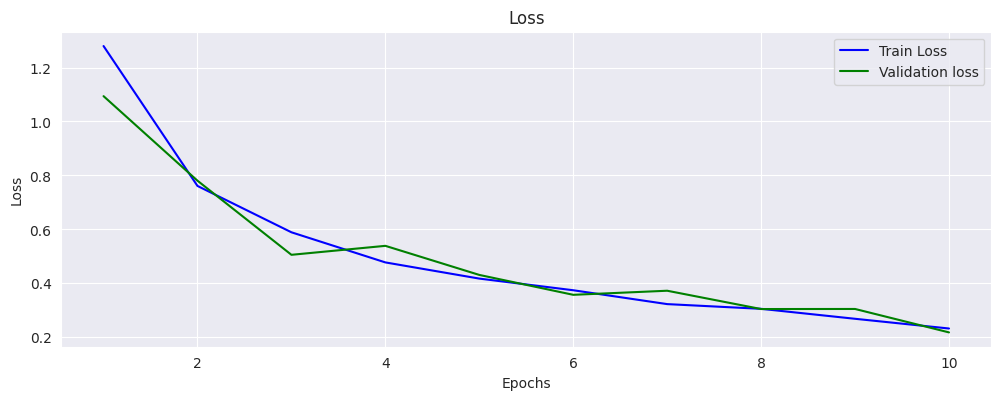

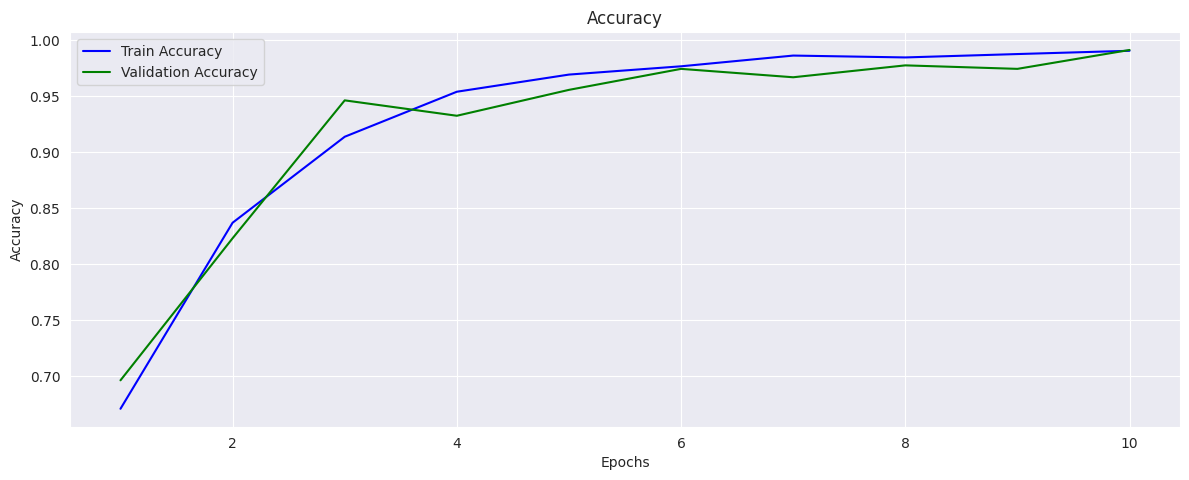

In [36]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = [i+1 for i in range(len(train_acc))]

plt.figure(figsize=(12,9))
plt.subplot(2,1,1)
plt.plot(epochs,train_loss,'b',label="Train Loss")
plt.plot(epochs,val_loss,'g',label="Validation loss")
plt.title("Loss")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.figure(figsize=(12,9))
plt.subplot(2,1,1)
plt.plot(epochs,train_acc,'b',label="Train Accuracy")
plt.plot(epochs,val_acc,'g',label="Validation Accuracy")
plt.title("Accuracy")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [37]:
predictions = model.predict(test_imgs) 
y_pred = np.argmax(predictions, axis = 1)
y_true = np.argmax(test_labels, axis = 1)

50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step


In [38]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       400
           1       1.00      1.00      1.00       400
           2       1.00      0.98      0.99       400
           3       0.98      0.99      0.99       400

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



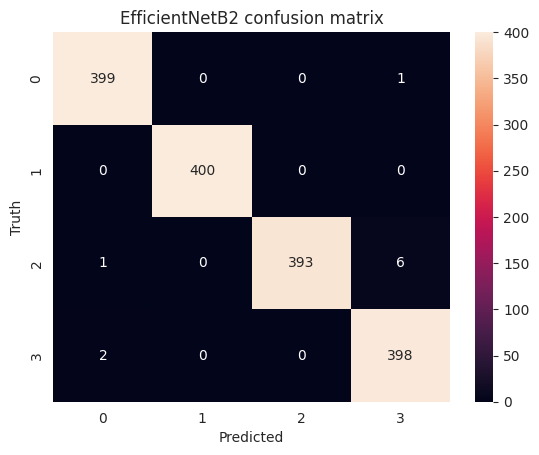

In [39]:
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("EfficientNetB2 confusion matrix")
plt.show()